# **Análise Exploratória dos Dados**


In [ ]:
#!pip install git+https://github.com/cmudig/AutoProfiler.git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import seaborn as sns
#import digautoprofiler as autoprofiler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set_palette("coolwarm")

In [ ]:
df = pd.read_csv('incendios_2012a2021.csv', encoding='utf-8')

In [ ]:
df.head()

,id,DISTRITO,TIPO,ANO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,FALSOALARME,...,TEMPERATURA,HUMIDADERELATIVA,VENTOINTENSIDADE,VENTOINTENSIDADE_VETOR,VENTODIRECAO_VETOR,ALTITUDEMEDIA,DECLIVEMEDIO,DENDIDADERV,COSN5VARIEDADE,ESTACAO
0,AG11217,Faro,Florestal,2012,0.0000,2.0000,0.0,2.0000,0,0,...,13.044220,60.355878,25.619265,6.611052,1.0,51.3787,29.0175,221.6560,11.78,Inverno
1,AG112183,Faro,Florestal,2012,2.0519,0.3076,0.0,2.3595,0,0,...,17.477997,26.022594,17.476209,5.051042,324.0,260.2370,29.2794,265.5130,8.30,Primavera
2,AG112189,Faro,Florestal,2012,0.0000,1.1500,0.0,1.1500,0,0,...,16.401001,65.835898,14.326569,3.767304,103.0,767.4720,30.8692,288.4600,10.28,Primavera
3,AG112213,Faro,Florestal,2012,1.2000,0.0000,0.0,1.2000,0,0,...,14.227692,60.986726,34.054126,9.915043,329.0,37.8237,10.2037,258.0660,11.14,Primavera
4,AG112216,Faro,Florestal,2012,1.3000,0.0000,0.0,1.3000,0,0,...,15.692719,74.894374,28.617102,7.865825,332.0,162.6790,33.7764,77.4753,5.23,Primavera


Vamos começar por explorar um pouco o nosso dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22335 entries, 0 to 22334
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22335 non-null  object 
 1   DISTRITO                22335 non-null  object 
 2   TIPO                    22335 non-null  object 
 3   ANO                     22335 non-null  int64  
 4   AREAPOV                 22335 non-null  float64
 5   AREAMATO                22335 non-null  float64
 6   AREAAGRIC               22335 non-null  float64
 7   AREATOTAL               22335 non-null  float64
 8   REACENDIMENTOS          22335 non-null  int64  
 9   FALSOALARME             22335 non-null  int64  
 10  DATAALERTA              22335 non-null  object 
 11  HORAALERTA              22335 non-null  object 
 12  LOCAL                   22335 non-null  object 
 13  CONCELHO                22335 non-null  object 
 14  FREGUESIA               22335 non-null

In [ ]:
df.shape

(22335, 39)

In [ ]:
df.describe()

,ANO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,FALSOALARME,DIA,MES,HORA,...,LON,TEMPERATURA,HUMIDADERELATIVA,VENTOINTENSIDADE,VENTOINTENSIDADE_VETOR,VENTODIRECAO_VETOR,ALTITUDEMEDIA,DECLIVEMEDIO,DENDIDADERV,COSN5VARIEDADE
count,22335.000000,22335.000000,22335.000000,22335.000000,22335.000000,22335.000000,22335.0,22335.000000,22335.000000,22335.000000,...,22335.000000,22335.000000,22335.000000,22335.000000,22335.000000,22335.000000,22335.000000,22335.000000,22335.000000,22335.000000
mean,2015.548153,27.560559,23.517783,2.983831,54.062172,0.082964,0.0,15.649563,6.466219,14.279427,...,-8.017765,20.568264,48.681764,10.847149,2.853985,190.586658,436.114809,18.472063,211.210485,16.838371
std,2.692320,558.963949,248.084095,72.713535,765.125735,0.275834,0.0,8.602674,2.740454,5.262242,...,0.588323,7.153094,17.566245,5.891810,1.610581,117.963705,278.697196,10.123053,169.242186,4.803189
min,2012.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,...,-9.484444,-2.464691,6.098997,0.102890,0.019427,0.000000,-58.005000,0.131287,0.000000,2.030000
25%,2013.000000,0.000000,0.510000,0.000000,1.500000,0.000000,0.0,8.000000,4.000000,12.000000,...,-8.416035,15.738754,35.380802,6.571404,1.711742,75.000000,201.444000,10.661900,106.546500,13.620000
50%,2015.000000,0.500000,1.650000,0.000000,3.000000,0.000000,0.0,15.000000,7.000000,15.000000,...,-8.085797,20.586395,46.599757,9.942021,2.571066,220.000000,402.698000,17.124500,165.064000,16.660000
75%,2017.000000,2.300000,5.000000,0.000000,8.790000,0.000000,0.0,23.000000,9.000000,17.000000,...,-7.665431,25.739594,60.271810,14.029506,3.688129,302.000000,644.891000,25.123000,258.519500,19.820000
max,2021.000000,47215.433221,15647.000000,5493.424200,53618.811555,1.000000,0.0,31.000000,12.000000,23.000000,...,-6.214583,43.669800,99.996221,49.216113,13.148440,359.000000,1603.810000,65.750600,1886.040000,37.880000


uma coisa que sai a vista é que a variavel FALSOALARME só tem valores negativos (0)

In [ ]:
df.dtypes

,0
id,object
DISTRITO,object
TIPO,object
ANO,int64
AREAPOV,float64
AREAMATO,float64
AREAAGRIC,float64
AREATOTAL,float64
REACENDIMENTOS,int64
FALSOALARME,int64


vamos verificar se não temos valores nulos:

In [ ]:
df.isnull().sum()

,0
id,0
DISTRITO,0
TIPO,0
ANO,0
AREAPOV,0
AREAMATO,0
AREAAGRIC,0
AREATOTAL,0
REACENDIMENTOS,0
FALSOALARME,0


In [ ]:
df.duplicated().sum()

0

Depois, efetuamos a correlação entre todas as variaveis numéricas.

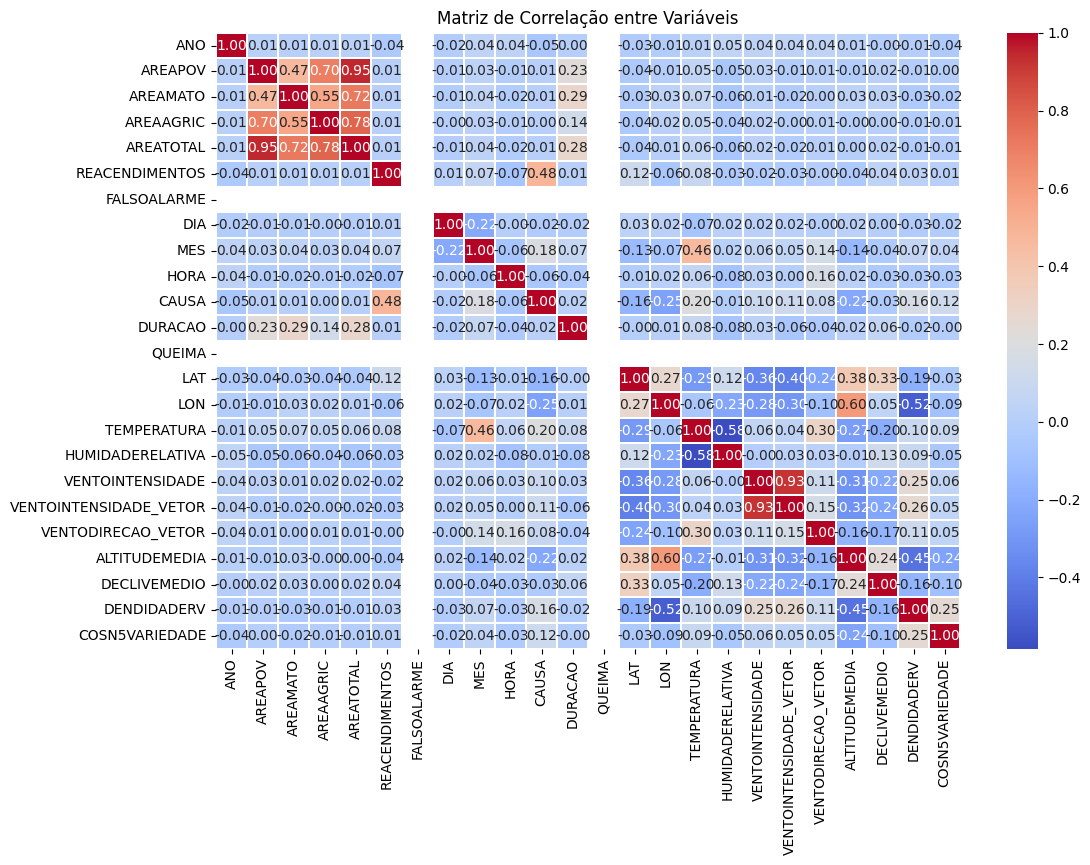

In [ ]:
df = df.apply(pd.to_numeric, errors='ignore')
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.2, cmap="coolwarm")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

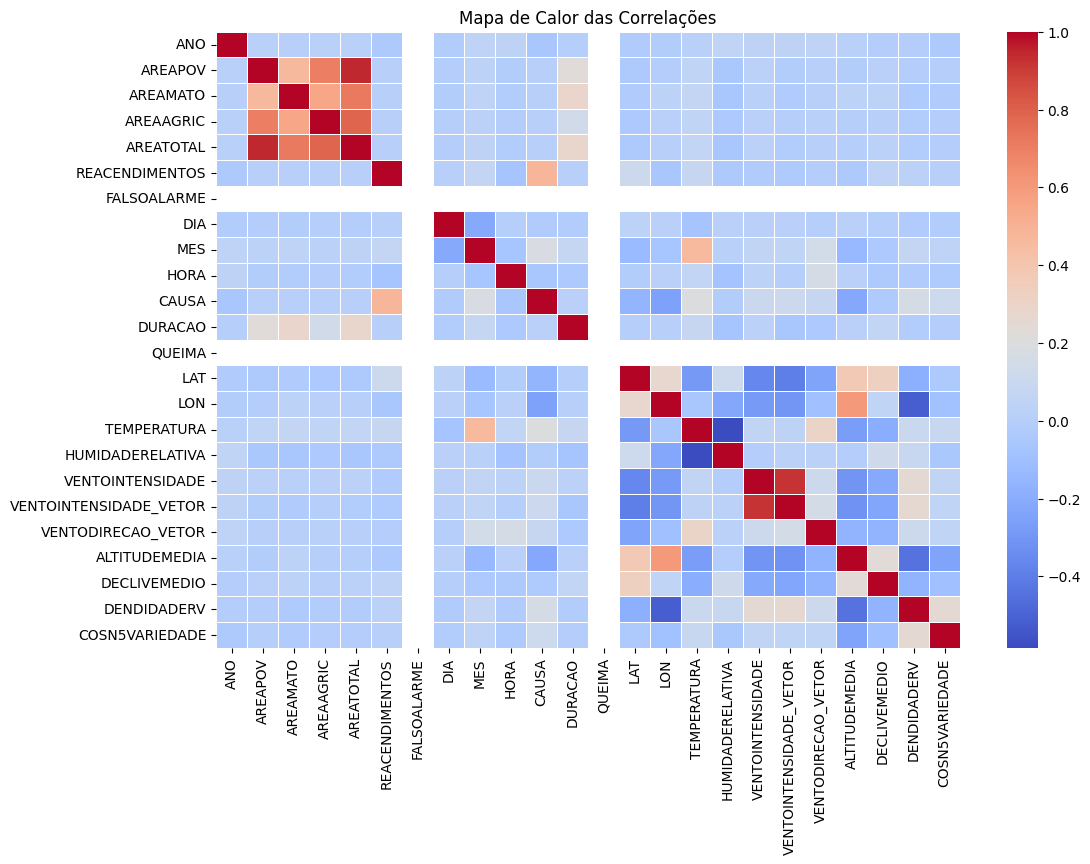

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor das Correlações")
plt.show()

- A área total e a área de povoação têm uma correlação muito alta (95%), portanto quando uma aumenta, a outra tende a aumentar com quase a mesma proporcão.
- As outras áreas (como área agrícola, área florestal, etc.) também apresentam correlações altas entre si ==> talvez os incêndios geralmente afetam múltiplas áreas ao mesmo tempo.
- Existe também uma correlação negativa significativa entre temperatura e humidade, o que faz sentido.

O falso alarme e a queima nao teem valores, ficamos curiosos sobre isso e portanto iremos averiguar, mais mais atenção, estas duas variaveis

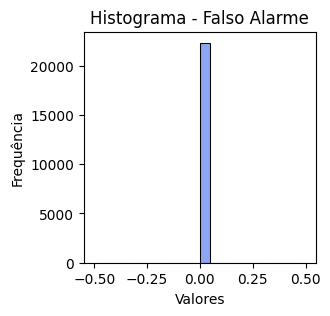

In [ ]:
plt.figure(figsize=(3, 3))
sns.histplot(df["FALSOALARME"].dropna(), bins=20, kde=False)
plt.title(f"Histograma - Falso Alarme")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

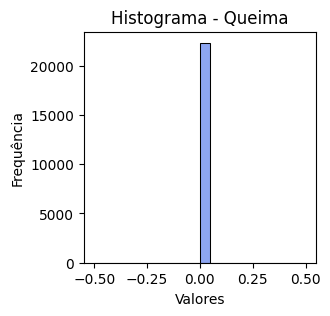

In [ ]:
plt.figure(figsize=(3, 3))
sns.histplot(df["QUEIMA"].dropna(), bins=20, kde=False)
plt.title(f"Histograma - Queima")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

E portanto, não incluem qualquer valor para nós, iremos eliminar

In [ ]:
df.drop(columns=["FALSOALARME", "QUEIMA"], inplace=True)

In [ ]:
df

,id,DISTRITO,TIPO,ANO,AREAPOV,AREAMATO,AREAAGRIC,AREATOTAL,REACENDIMENTOS,DATAALERTA,...,TEMPERATURA,HUMIDADERELATIVA,VENTOINTENSIDADE,VENTOINTENSIDADE_VETOR,VENTODIRECAO_VETOR,ALTITUDEMEDIA,DECLIVEMEDIO,DENDIDADERV,COSN5VARIEDADE,ESTACAO
0,AG11217,Faro,Florestal,2012,0.0000,2.0000,0.0,2.0000,0,27-01-2012,...,13.044220,60.355878,25.619265,6.611052,1.0,51.3787,29.01750,221.6560,11.78,Inverno
1,AG112183,Faro,Florestal,2012,2.0519,0.3076,0.0,2.3595,0,21-03-2012,...,17.477997,26.022594,17.476209,5.051042,324.0,260.2370,29.27940,265.5130,8.30,Primavera
2,AG112189,Faro,Florestal,2012,0.0000,1.1500,0.0,1.1500,0,23-03-2012,...,16.401001,65.835898,14.326569,3.767304,103.0,767.4720,30.86920,288.4600,10.28,Primavera
3,AG112213,Faro,Florestal,2012,1.2000,0.0000,0.0,1.2000,0,16-04-2012,...,14.227692,60.986726,34.054126,9.915043,329.0,37.8237,10.20370,258.0660,11.14,Primavera
4,AG112216,Faro,Florestal,2012,1.3000,0.0000,0.0,1.3000,0,17-04-2012,...,15.692719,74.894374,28.617102,7.865825,332.0,162.6790,33.77640,77.4753,5.23,Primavera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22330,TM22177,Bragança,Florestal,2021,0.0000,1.9400,0.0,1.9400,0,21-03-2021,...,13.097200,37.923097,4.634185,1.473769,332.0,902.6660,32.47250,47.2963,15.05,Primavera
22331,TM2219,Bragança,Florestal,2021,0.0000,1.4400,0.0,1.4400,0,18-01-2021,...,6.890100,68.781753,3.052648,0.697530,131.0,759.4680,23.17430,36.5946,11.85,Inverno
22332,TM22195,Bragança,Florestal,2021,0.0000,6.4100,0.0,6.4100,0,26-03-2021,...,14.628600,41.999520,13.396806,3.581039,296.0,731.5170,5.75818,54.4931,15.09,Primavera
22333,TM22196,Bragança,Florestal,2021,0.0000,5.4800,0.0,5.4800,0,26-03-2021,...,12.706700,43.762404,14.593105,3.539151,314.0,885.6080,18.06510,73.3493,10.69,Primavera


Vamos agora conhecer mais um pouco das restantes variaveis.

Vamo-nos focar na analise temporal dos incendios.

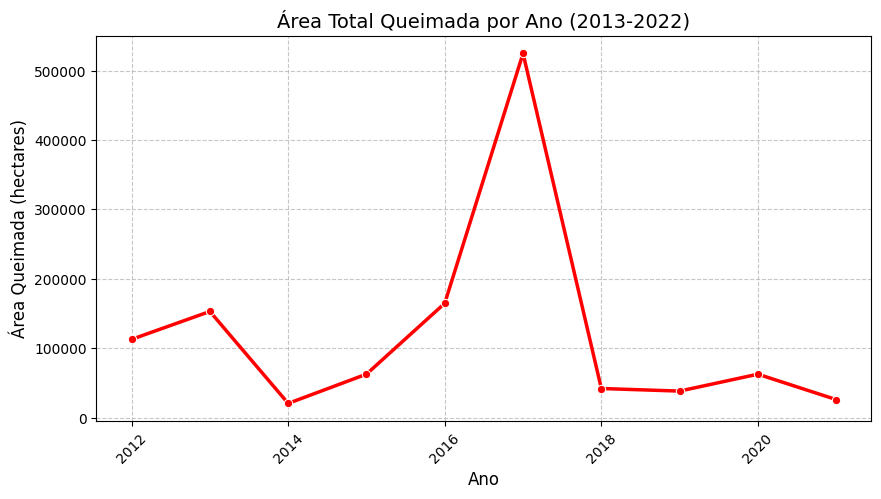

In [ ]:
area_total_por_ano = df.groupby("ANO")["AREATOTAL"].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=area_total_por_ano.index, y=area_total_por_ano.values, marker="o", color="red", linewidth=2.5)
plt.title("Área Total Queimada por Ano (2013-2022)", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Área Queimada (hectares)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

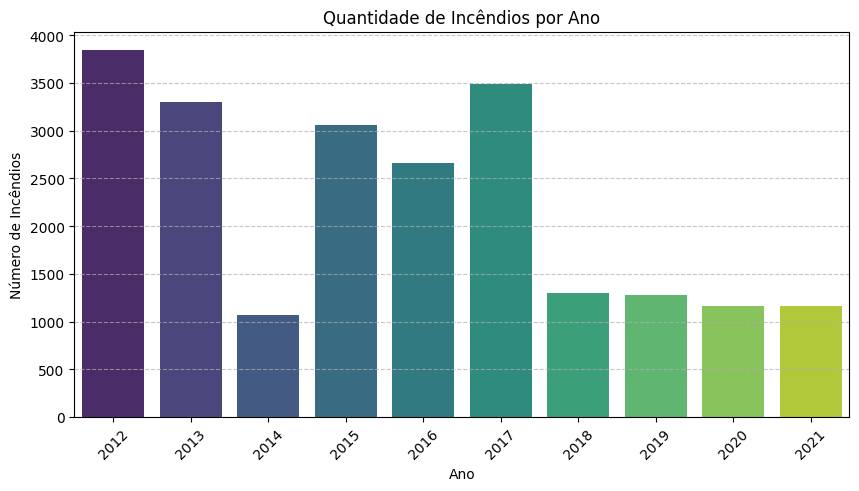

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['ANO'], palette="viridis")
plt.title("Quantidade de Incêndios por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de Incêndios")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Felizmente, nos últimos anos o número de incêndios diminuiu


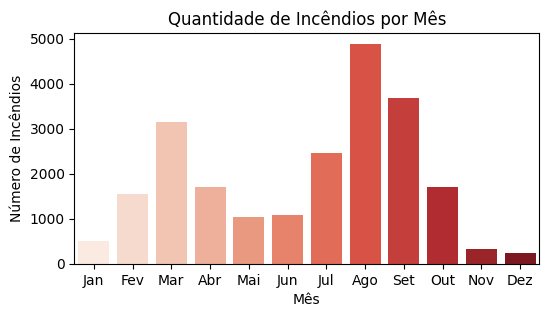

In [ ]:
incendios_por_mes = df['MES'].value_counts().sort_index()

plt.figure(figsize=(6, 3))
sns.barplot(x=incendios_por_mes.index, y=incendios_por_mes.values, palette="Reds")  # palette="Reds"
plt.title("Quantidade de Incêndios por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Incêndios")
plt.xticks(range(0, 12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

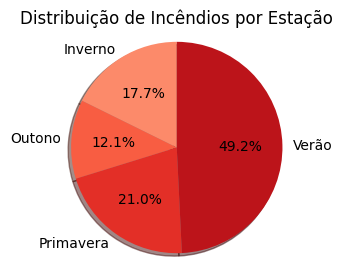

In [ ]:
incendios_por_mes = df['ESTACAO'].value_counts().sort_index()

plt.figure(figsize=(3, 3))
plt.pie(incendios_por_mes.values, labels=incendios_por_mes.index, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=plt.cm.Reds(np.linspace(0.4, 0.8, len(incendios_por_mes))))
plt.axis('equal')
plt.title("Distribuição de Incêndios por Estação")
plt.show()

Verão é a estação do ano onde existem maior número de incêndios

Queremos também entender mais sobre a duração dos incendios

In [ ]:
df['DHINICIO'] = pd.to_datetime(df['DHINICIO'], errors='coerce')
df['DHFIM'] = pd.to_datetime(df['DHFIM'], errors='coerce')

df['DURACAO_HORAS'] = (df['DHFIM'] - df['DHINICIO']).dt.total_seconds() / 3600

df = df[df['DURACAO_HORAS'] > 0]

In [ ]:
df.columns

Index(['id', 'DISTRITO', 'TIPO', 'ANO', 'AREAPOV', 'AREAMATO', 'AREAAGRIC',
       'AREATOTAL', 'REACENDIMENTOS', 'DATAALERTA', 'HORAALERTA', 'LOCAL',
       'CONCELHO', 'FREGUESIA', 'DIA', 'MES', 'HORA', 'CAUSA', 'TIPOCAUSA',
       'DHINICIO', 'DHFIM', 'DURACAO', 'DATAEXTINCAO', 'HORAEXTINCAO', 'LAT',
       'LON', 'CAUSAFAMILIA', 'TEMPERATURA', 'HUMIDADERELATIVA',
       'VENTOINTENSIDADE', 'VENTOINTENSIDADE_VETOR', 'VENTODIRECAO_VETOR',
       'ALTITUDEMEDIA', 'DECLIVEMEDIO', 'DENDIDADERV', 'COSN5VARIEDADE',
       'ESTACAO', 'DURACAO_HORAS'],
      dtype='object')

In [ ]:
df[['DURACAO', 'DURACAO_HORAS', 'HORAEXTINCAO', 'HORAALERTA', 'DHFIM', 'DHINICIO']]

,DURACAO,DURACAO_HORAS,HORAEXTINCAO,HORAALERTA,DHFIM,DHINICIO
0,132.0,2.200000,17:25,15:13,2012-01-27 17:25:00,2012-01-27 15:13:00
1,293.0,4.883333,19:50,14:57,2012-03-21 19:50:00,2012-03-21 14:57:00
2,100.0,1.666667,23:28,21:48,2012-03-23 23:28:00,2012-03-23 21:48:00
3,245.0,4.083333,18:35,14:30,2012-04-16 18:35:00,2012-04-16 14:30:00
4,151.0,2.516667,18:01,15:30,2012-04-17 18:01:00,2012-04-17 15:30:00
...,...,...,...,...,...,...
22330,284.0,4.733333,20:05,15:21,2021-03-21 20:05:00,2021-03-21 15:21:00
22331,108.0,1.800000,14:00,12:12,2021-01-18 14:00:00,2021-01-18 12:12:00
22332,150.0,2.500000,17:08,14:38,2021-03-26 17:08:00,2021-03-26 14:38:00
22333,113.0,1.883333,19:04,17:11,2021-03-26 19:04:00,2021-03-26 17:11:00


Existe uma certa incoerencia entre a duração do incêndio e o intervalo de tempo entre o alerta e a extinção. No entanto, faz sentido assumir que o alerta pode ser dado antes do início efetivo do incêndio, por exemplo, quando há indícios de fogo iminente. ==> portanto esta discrepância não significa necessariamente um erro nos dados, mas sim uma característica do próprio processo de deteção e resposta aos incêndios.

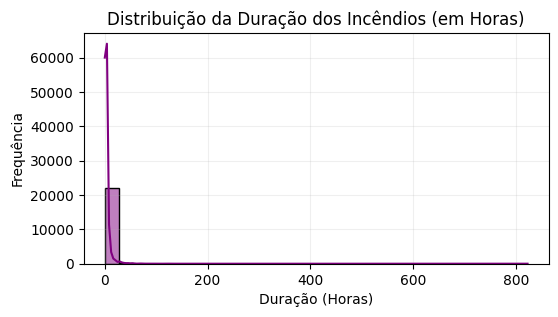

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(df['DURACAO_HORAS'], bins=30, kde=True, color="purple")
plt.title("Distribuição da Duração dos Incêndios (em Horas)")
plt.xlabel("Duração (Horas)")
plt.ylabel("Frequência")
plt.grid(alpha=0.2)
plt.show()

Agora, vamos ver a distribuição geográfica

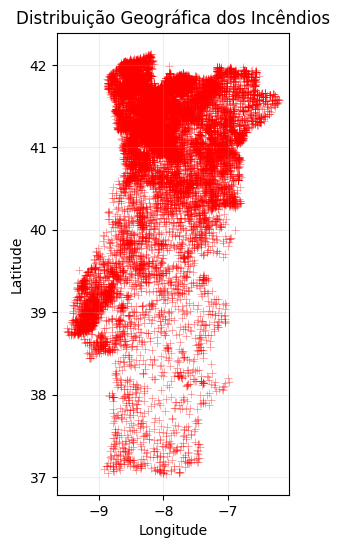

In [ ]:
plt.figure(figsize=(3, 6))
sns.scatterplot(x=df['LON'], y=df['LAT'], alpha=0.5, color='red', marker='+')
#plt.gca().set_facecolor('#FAFAFA')
plt.title("Distribuição Geográfica dos Incêndios")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, alpha=0.2)
plt.show()

In [ ]:
df["DISTRITO"] = df["DISTRITO"].replace("Viana Do Castelo", "Viana do Castelo")

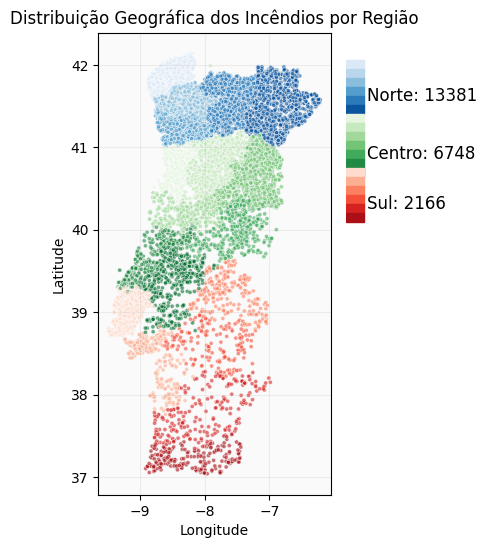

In [ ]:
regioes = {
    "Norte": ["Viana do Castelo", "Viana Do Castelo", "Braga", "Porto", "Vila Real", "Bragança"],
    "Centro": ["Aveiro", "Viseu", "Coimbra", "Guarda", "Castelo Branco", "Leiria", "Santarém"],
    "Sul": ["Lisboa", "Setúbal", "Portalegre", "Évora", "Beja", "Faro"]
}

palette_norte = sns.color_palette("Blues", len(regioes["Norte"]))
palette_centro = sns.color_palette("Greens", len(regioes["Centro"]))
palette_sul = sns.color_palette("Reds", len(regioes["Sul"]))

cor_distrito = {distrito: palette_norte[i] for i, distrito in enumerate(regioes["Norte"])}
cor_distrito.update({distrito: palette_centro[i] for i, distrito in enumerate(regioes["Centro"])})
cor_distrito.update({distrito: palette_sul[i] for i, distrito in enumerate(regioes["Sul"])})


df['REGIAO'] = df['DISTRITO'].apply(lambda x: 'Norte' if x in regioes['Norte'] else
                                    'Centro' if x in regioes['Centro'] else
                                    'Sul' if x in regioes['Sul'] else 'Outro')

contagem_por_regiao = df['REGIAO'].value_counts()

plt.figure(figsize=(3, 6))
sns.scatterplot(x=df['LON'], y=df['LAT'], hue=df['DISTRITO'], palette=cor_distrito, alpha=0.6, marker='.')
plt.legend([], [], frameon=False)

plt.gca().set_facecolor('#FAFAFA')
plt.title("Distribuição Geográfica dos Incêndios por Região")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, alpha=0.2)

fig, ax = plt.gcf(), plt.gca()
legend_ax = fig.add_axes([0.95, 0.55, 0.2, 0.3])

def draw_palette(ax, colors, y, label):
    for i, color in enumerate(colors):
        ax.add_patch(mpatches.Rectangle((0, y - i * 0.05), 0.3, 0.05, color=color, transform=ax.transAxes))
    count = contagem_por_regiao.get(label, 0)
    ax.text(0.35, y - (len(colors) * 0.025), f"{label}: {count}",
            transform=ax.transAxes, fontsize=12, verticalalignment='center')

# Desenhar legendas com contagens
draw_palette(legend_ax, palette_norte, 0.9, "Norte")
draw_palette(legend_ax, palette_centro, 0.6, "Centro")
draw_palette(legend_ax, palette_sul, 0.3, "Sul")

# Configurar eixo da legenda
legend_ax.set_xticks([])
legend_ax.set_yticks([])
legend_ax.set_frame_on(False)

plt.show()

Podemos verificiar que na região do norte houveram muitos mais incendios comparativamente com os outros

Adiante, vamos entender a relação entre as condições climáticas e os incêndios:

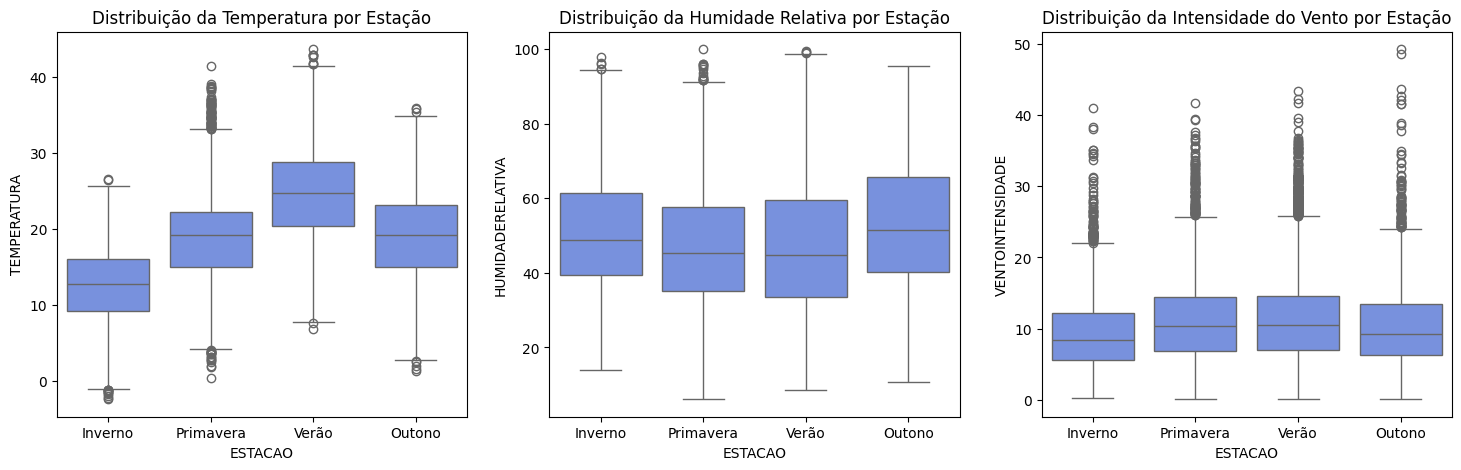

In [ ]:
cols_to_convert = ["TEMPERATURA", "HUMIDADERELATIVA", "VENTOINTENSIDADE", "AREATOTAL"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x="ESTACAO", y="TEMPERATURA", data=df, ax=axes[0])
axes[0].set_title("Distribuição da Temperatura por Estação")

sns.boxplot(x="ESTACAO", y="HUMIDADERELATIVA", data=df, ax=axes[1])
axes[1].set_title("Distribuição da Humidade Relativa por Estação")

sns.boxplot(x="ESTACAO", y="VENTOINTENSIDADE", data=df, ax=axes[2])
axes[2].set_title("Distribuição da Intensidade do Vento por Estação")

plt.show()

Pelos boxplots, podemos retirar que a temperatura é mais alta no verão e mais baixa no inverno, como esperado. Além disso, a humidade relativa é menor no verão, o que pode facilitar a propagação de incêndios; e a intensidade do vento não varia tanto entre estações, mas pode ter um impacto local.

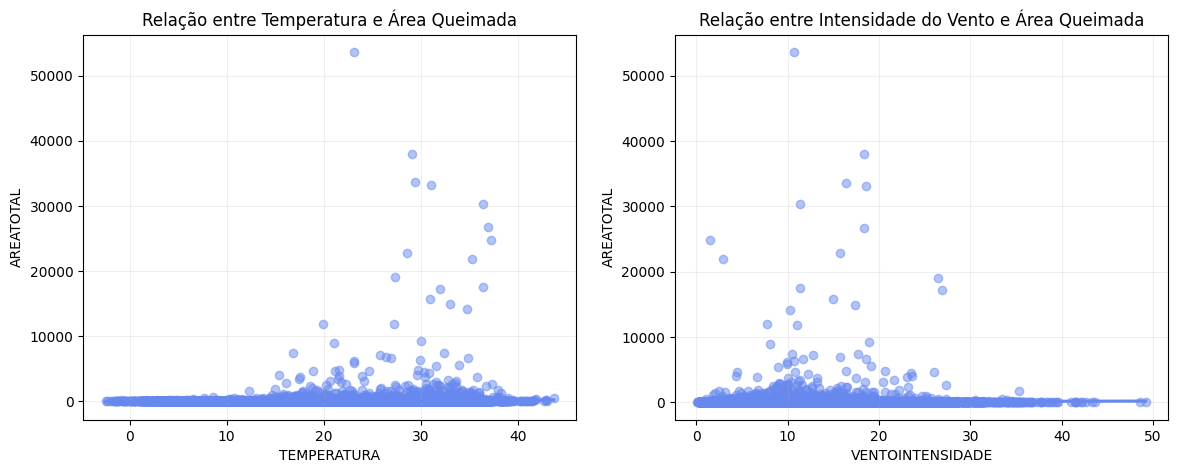

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.regplot(x="TEMPERATURA", y="AREATOTAL", data=df, ax=axes[0], scatter_kws={'alpha':0.5})
axes[0].set_title("Relação entre Temperatura e Área Queimada")
axes[0].grid(True, alpha=0.2)

sns.regplot(x="VENTOINTENSIDADE", y="AREATOTAL", data=df, ax=axes[1], scatter_kws={'alpha':0.5})
axes[1].set_title("Relação entre Intensidade do Vento e Área Queimada")
axes[1].grid(True, alpha=0.2)

plt.show()

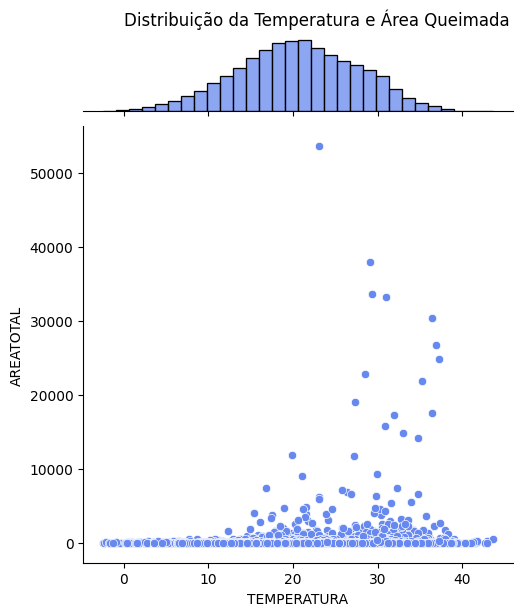

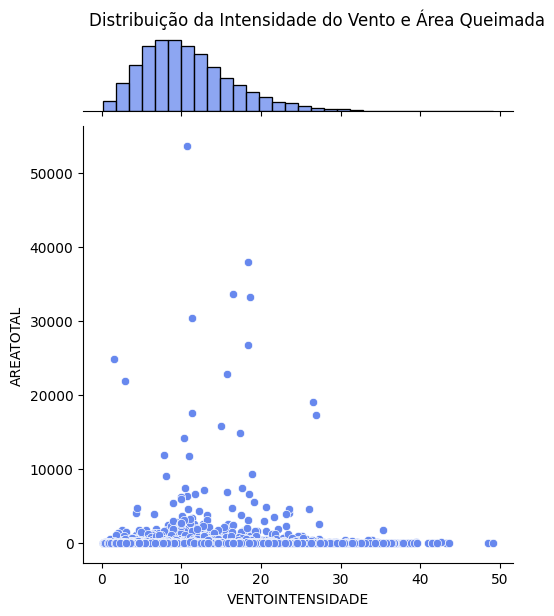

In [ ]:
df_filtered = df[['TEMPERATURA', 'VENTOINTENSIDADE', 'AREATOTAL']].dropna()

g1 = sns.jointplot(data=df_filtered, x="TEMPERATURA", y="AREATOTAL",
                   kind="scatter", marginal_kws={"bins": 30, "fill": True},)
g1.ax_marg_y.remove()
g1.fig.suptitle("Distribuição da Temperatura e Área Queimada", y=1.02)


g2 = sns.jointplot( data=df_filtered, x="VENTOINTENSIDADE", y="AREATOTAL",
                   kind="scatter", marginal_kws={"bins": 30, "fill": True},)
g2.ax_marg_y.remove()
g2.fig.suptitle("Distribuição da Intensidade do Vento e Área Queimada", y=1.02)
plt.show()

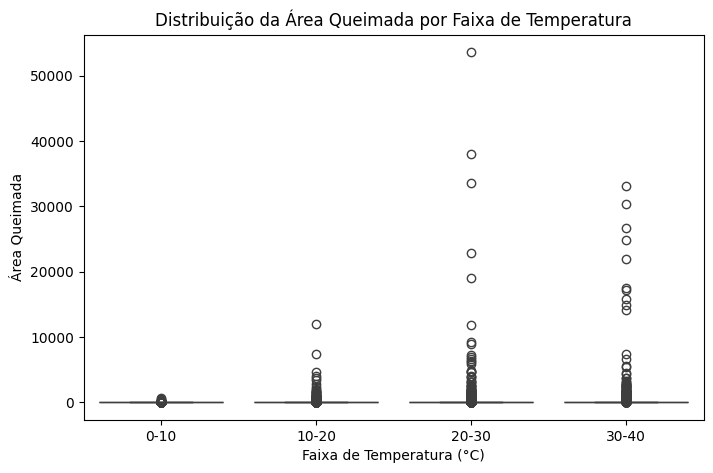

In [ ]:
df_filtered["TEMP_BIN"] = pd.cut(df_filtered["TEMPERATURA"], bins=[0,10,20,30,40], labels=["0-10", "10-20", "20-30", "30-40"])

plt.figure(figsize=(8,5))
sns.boxplot(x="TEMP_BIN", y="AREATOTAL", data=df_filtered, palette="Reds")
plt.title("Distribuição da Área Queimada por Faixa de Temperatura")
plt.xlabel("Faixa de Temperatura (°C)")
plt.ylabel("Área Queimada")
plt.show()

In [ ]:
df_filtered.describe()

,TEMPERATURA,VENTOINTENSIDADE,AREATOTAL
count,22295.000000,22295.000000,22295.000000
mean,20.567617,10.849764,53.809762
std,7.152716,5.892973,765.158276
min,-2.464691,0.102890,1.000000
25%,15.738754,6.576138,1.500000
50%,20.580902,9.942263,3.000000
75%,25.737701,14.031449,8.718000
max,43.669800,49.216113,53618.811555


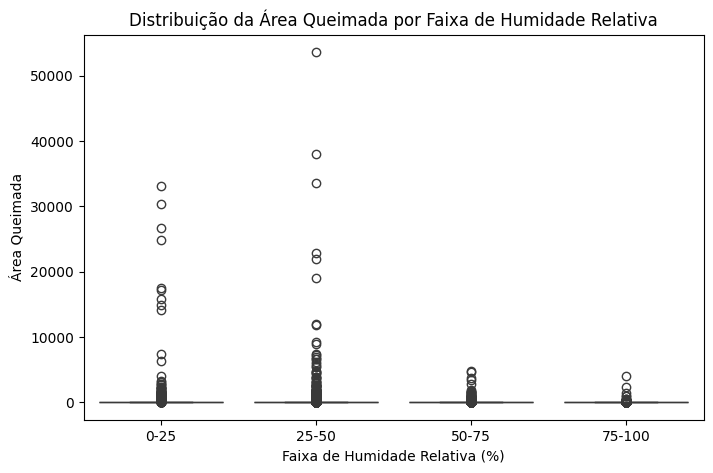

In [ ]:
df_filtered["HUM_BIN"] = pd.cut(df["HUMIDADERELATIVA"], bins=[0, 25, 50, 75, 100], labels=["0-25", "25-50", "50-75", "75-100"])

plt.figure(figsize=(8, 5))
sns.boxplot(x="HUM_BIN", y="AREATOTAL", data=df_filtered, palette="Blues_r")
plt.title("Distribuição da Área Queimada por Faixa de Humidade Relativa")
plt.xlabel("Faixa de Humidade Relativa (%)")
plt.ylabel("Área Queimada")
plt.show()

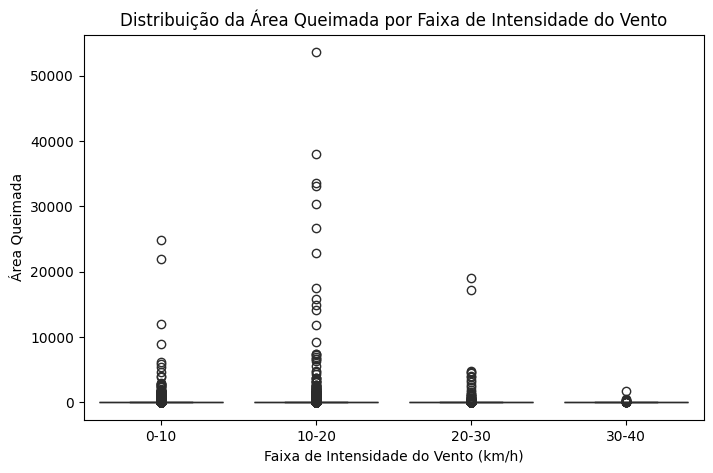

In [ ]:
df_filtered["VENTO_BIN"] = pd.cut(df_filtered["VENTOINTENSIDADE"],
                                 bins=[0, 10, 20, 30, 40],
                                 labels=["0-10", "10-20", "20-30", "30-40"])

plt.figure(figsize=(8, 5))
sns.boxplot(x="VENTO_BIN", y="AREATOTAL", data=df_filtered, palette="Greens")
plt.title("Distribuição da Área Queimada por Faixa de Intensidade do Vento")
plt.xlabel("Faixa de Intensidade do Vento (km/h)")
plt.ylabel("Área Queimada")
plt.show()

podemos verificar que existe um claro aumento da área queimada conforme a temperatura aumenta.

Tipos de Incêndios e causas

In [ ]:
df["CAUSA"]

infelizemntente, nao temos nenhum acesso a informação do que poderá ser esta variavel, e que causa poderá ser. Pelo que a teremos de retirar e focar nas restantes informações

In [ ]:
df = df.drop(columns=["CAUSA"])

In [ ]:
df[["TIPOCAUSA", "CAUSAFAMILIA"]]

,TIPOCAUSA,CAUSAFAMILIA
0,Desconhecida,Indeterminadas
1,Negligente,Acidentais - Maquinaria
2,Negligente,Uso do fogo - Fogueiras
3,Negligente,Uso do fogo - Queima de lixo
4,Negligente,Acidentais - Maquinaria
...,...,...
22330,Desconhecida,Indeterminadas
22331,Negligente,Queimadas de sobrantes florestais ou agrícolas
22332,Negligente,Queimas amontoados de sobrantes florestais ou ...
22333,Negligente,Queimadas para gestão de pasto para gado


In [ ]:
df["TIPOCAUSA"].unique()

In [ ]:
df["CAUSAFAMILIA"].unique()

Esta ultima variavel é muito grande

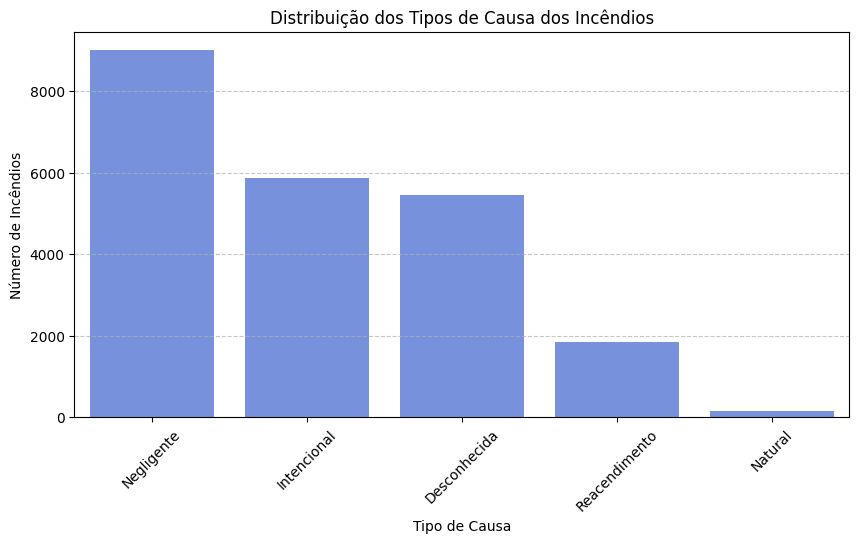

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["TIPOCAUSA"], order=df["TIPOCAUSA"].value_counts().index)
plt.title("Distribuição dos Tipos de Causa dos Incêndios")
plt.xlabel("Tipo de Causa")
plt.ylabel("Número de Incêndios")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

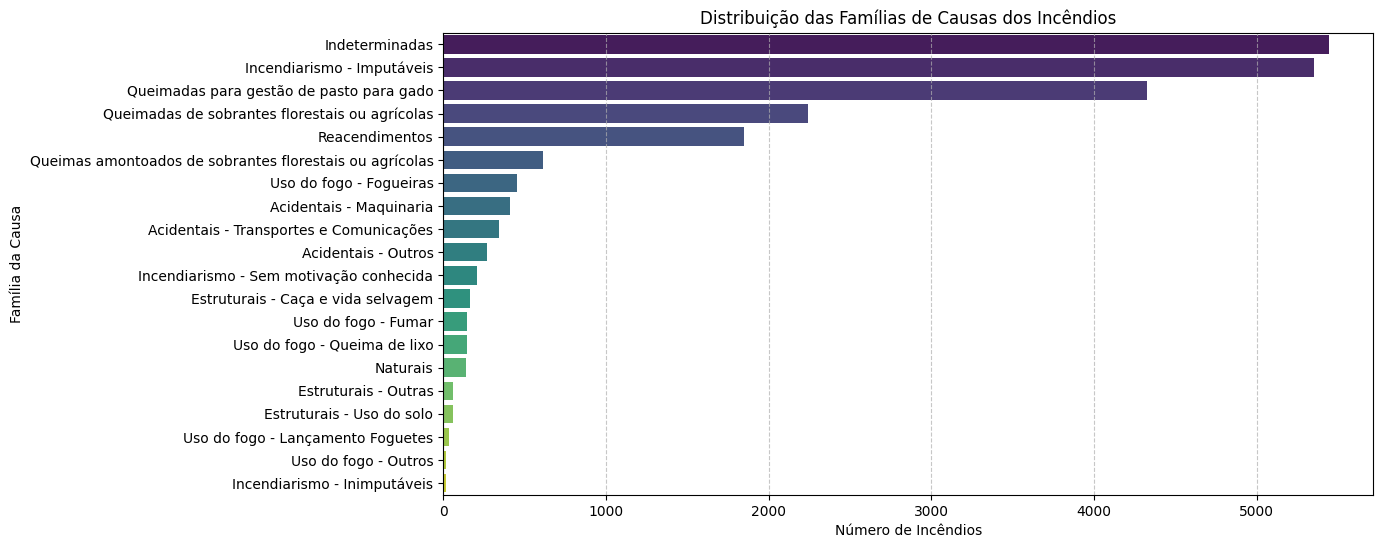

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df["CAUSAFAMILIA"], palette="viridis", order=df["CAUSAFAMILIA"].value_counts().index)
plt.title("Distribuição das Famílias de Causas dos Incêndios")
plt.xlabel("Número de Incêndios")
plt.ylabel("Família da Causa")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

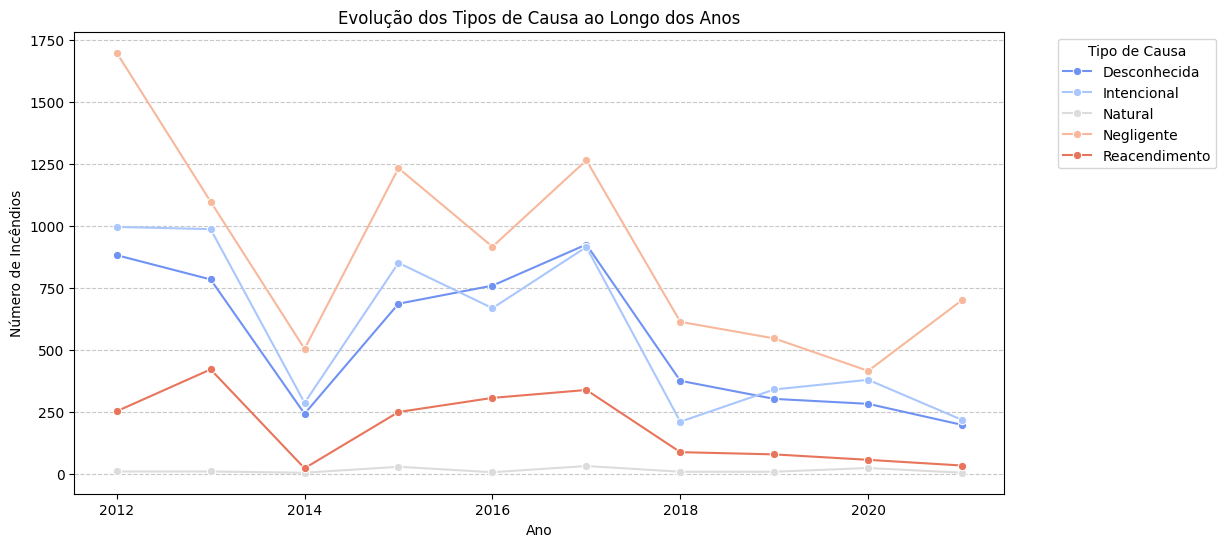

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby(["ANO", "TIPOCAUSA"]).size().reset_index(name="Quantidade"),
             x="ANO", y="Quantidade", hue="TIPOCAUSA", marker="o", palette="coolwarm")
plt.title("Evolução dos Tipos de Causa ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Número de Incêndios")
plt.legend(title="Tipo de Causa", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

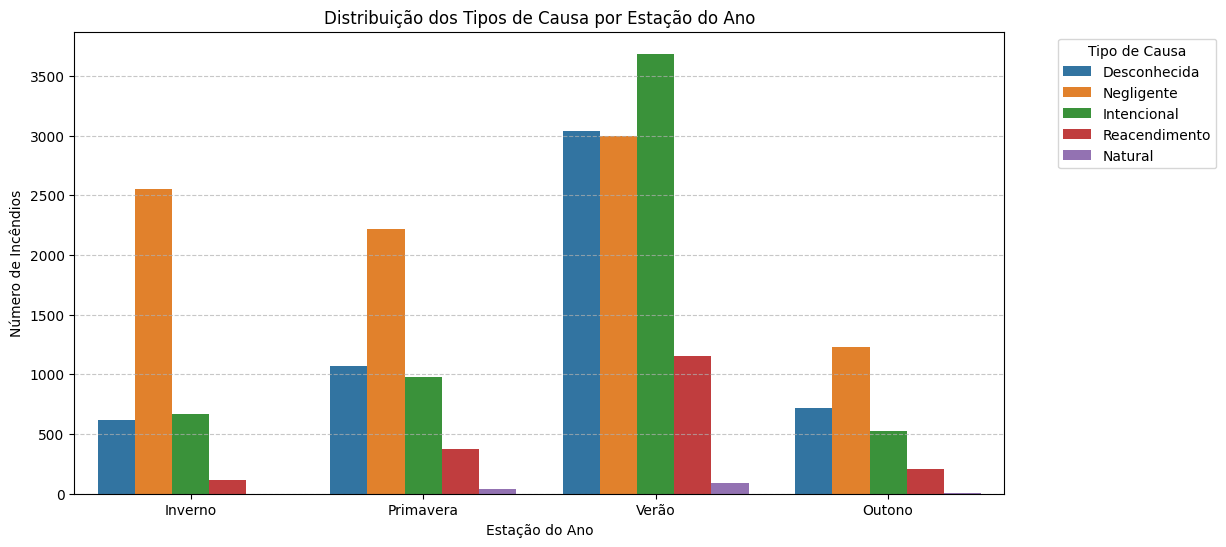

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["ESTACAO"], hue=df["TIPOCAUSA"], palette="tab10")
plt.title("Distribuição dos Tipos de Causa por Estação do Ano")
plt.xlabel("Estação do Ano")
plt.ylabel("Número de Incêndios")
plt.legend(title="Tipo de Causa", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


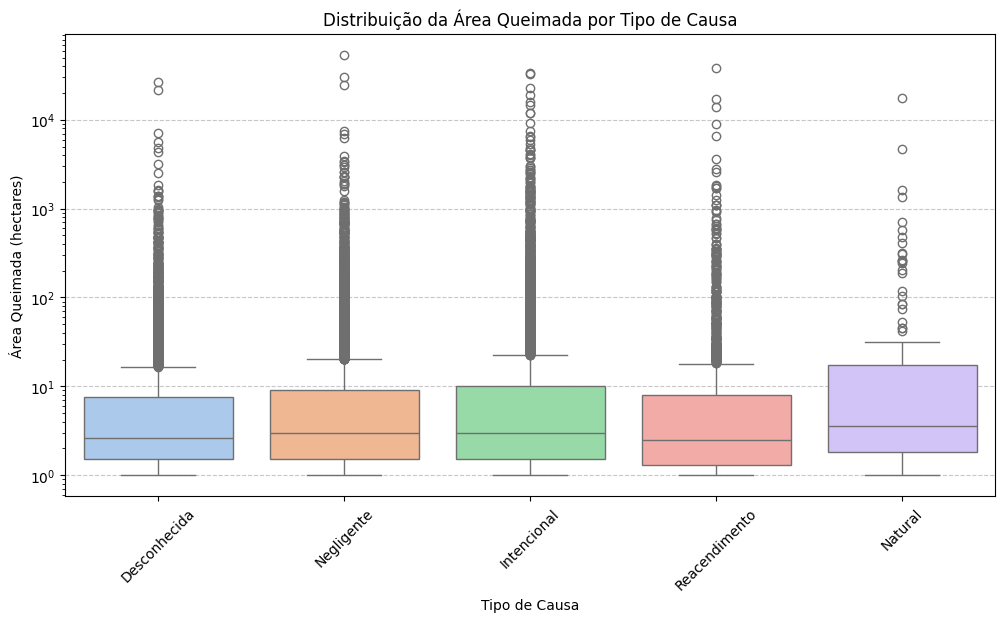

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["TIPOCAUSA"], y=df["AREATOTAL"], palette="pastel")
plt.title("Distribuição da Área Queimada por Tipo de Causa")
plt.xlabel("Tipo de Causa")
plt.ylabel("Área Queimada (hectares)")
plt.xticks(rotation=45)
plt.yscale("log")  # Usar escala logarítmica para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()